
<h1 style="border: 2px solid black; padding: 15px; border-radius: 12px;" align='center'>Cours IA et Applications</h1>    

<h2 align='center'> Deep Learning : Entrainement d'un convnet à la main </h2>

<h3 align='center'> Jordy Palafox </h3>
<h3 align='center'> Ing2 GSI/MI - 2023/2024 </h3>
      
      
<div style="display:flex"> 
    <img src="cytech.png", style="width:250px;height:50"> 
    <img src="cy.jpg", style="width:300px;height:100px"> 
</div> 

Dans ce notebook, on va construire notre premier modèle de classification d'images avec des couches de convolution !

 # Import des packages

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Préparation des données

On va encore travailler sur le jeu de données MNIST !

In [2]:
# MNIST a 10 classes différentes
num_classes = 10

# Les données sont des images 28x28 en niveau de gris
input_shape = (28, 28, 1)

# Chargement du jeu de données
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Mise à l'échelle
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Vérification de la bonne forme des tenseurs (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# Préparation des labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Passons à la construction du modèle 

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dropout (Dropout)           (None, 3200)              0

2023-02-25 23:46:44.793717: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 23:46:44.822100: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 23:46:44.822265: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 23:46:44.822731: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

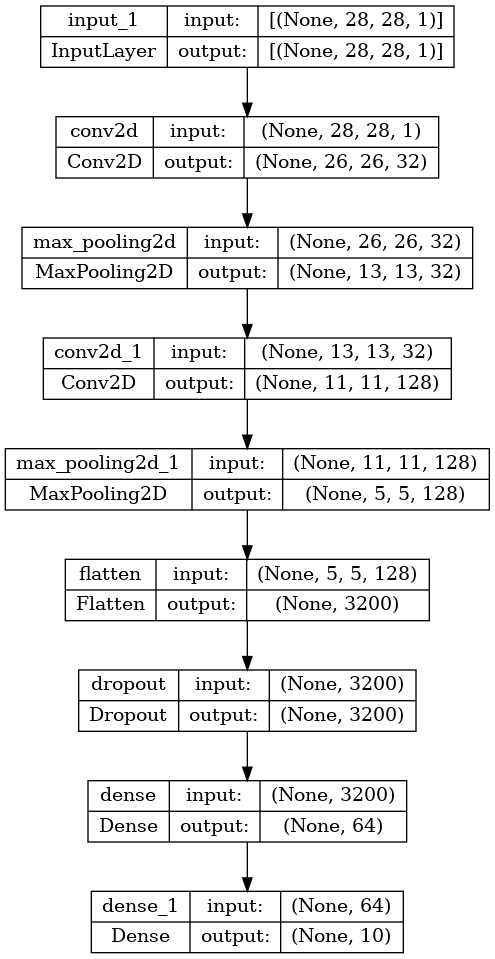

In [4]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_cnn_1_plot.png', show_shapes=True, show_layer_names=True)

# Entraînement du modèle 

In [5]:
# Batch size est le nombre de données qui passent à travers le réseau simultanément
# On le prend petit pour épargner la mémoire !
batch_size = 128

# On va entraîner sur 15 epochs
epochs = 15

# Configuration du modèle
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print('Passons à l\'entraînement')
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Passons à l'entraînement
Epoch 1/15


2023-02-25 23:46:53.705401: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8302
2023-02-25 23:46:54.535279: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-25 23:46:54.586502: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


422/422 [==============================] - 3s 3ms/step - loss: 0.2392 - accuracy: 0.9268 - val_loss: 0.0594 - val_accuracy: 0.9850
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0776 - accuracy: 0.9767 - val_loss: 0.0427 - val_accuracy: 0.9888
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0369 - val_accuracy: 0.9898
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0346 - val_accuracy: 0.9900
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.0323 - val_accuracy: 0.9907
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.0302 - val_accuracy: 0.9907
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.0358 - val_accuracy: 0.9910
Epoch 8/15
422/42

# Evaluation du modèle sur le jeu de données de test

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022790061309933662
Test accuracy: 0.9926999807357788


On a 3 fois moins de paramètres que le gros modèle précédent pourtant on a des scores aussi bons !
